In [1]:
# -*- coding: utf-8 -*-

import paho.mqtt.client as mqtt
import json

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("MQTT: connected with result code "+str(rc))
    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("tele/tasmota_B5F9F3/SENSOR")
    client.subscribe("tele/tasmota_0D6E87/SENSOR")


In [4]:
# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    global counter, fig, x ,y, ax
    topicTree = msg.topic.split('/')
    print("on_message: MQTT: %s [%d] payload: %s" % (msg.topic , len(topicTree),  msg.payload.decode()) )
    
    # {"Time":"2021-12-28T19:34:50","VINDRIKTNING":{"PM2.5":13}}
    jdata = json.loads(str(msg.payload.decode('utf-8')))
    pm25 = jdata['VINDRIKTNING']['PM2.5']
    print(pm25)

    counter+=1
    print("counter %d " % counter)
    x = np.arange(0, 60, 1)
    y[counter%60] = float(pm25)
    ax.plot(x, y)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [5]:
#setup mqtt
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("192.168.179.2", 1883, 60)

0

<IPython.core.display.Javascript object>


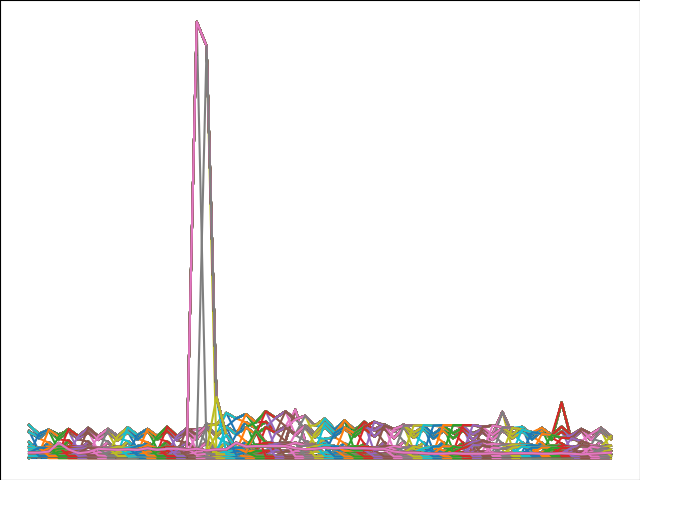

In [6]:
counter=0
x = np.arange(0, 60, 1)
y = 0*x+0
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x, y)
ax.set_title("A main chirp")
fig.canvas.draw()
fig.canvas.flush_events()

In [ ]:
client.loop_forever()

MQTT: connected with result code 0
on_message: MQTT: tele/tasmota_B5F9F3/SENSOR [3] payload: {"Time":"2021-12-28T19:49:50","VINDRIKTNING":{"PM2.5":12}}
12
counter 1 
on_message: MQTT: tele/tasmota_0D6E87/SENSOR [3] payload: {"Time":"2021-12-28T19:50:25","VINDRIKTNING":{"PM2.5":29}}
29
counter 2 
on_message: MQTT: tele/tasmota_B5F9F3/SENSOR [3] payload: {"Time":"2021-12-28T19:50:50","VINDRIKTNING":{"PM2.5":14}}
14
...
on_message: MQTT: tele/tasmota_0D6E87/SENSOR [3] payload: {"Time":"2021-12-29T13:28:31","VINDRIKTNING":{"PM2.5":11}}
11
counter 1146 
